# [Lecture 3 demo](https://python-public-policy.afeld.me/en/{{school_slug}}/lecture_3.html#fertility-rates-demo) solution

Ensure the visualizations [render](https://plotly.com/python/renderers/) properly across VSCode, Jupyter Book, etc. You can ignore this.

In [1]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

## Load data

This downloads data in an automated way; can jump ahead to [reading the data](#read-data).

Create the clean folder for the files.

In [2]:
!mkdir -p tmp
!rm -rf tmp/fertility*

Download the CSV in a ZIP.

In [3]:
!wget -O tmp/fertility.zip -nc 'https://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=csv'

--2025-11-12 19:25:00--  https://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 172.64.145.25, 104.18.42.231
Connecting to api.worldbank.org (api.worldbank.org)|172.64.145.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73099 (71K) [application/zip]
Saving to: ‘tmp/fertility.zip’

tmp/fertility.zip   100%[===================>]  71.39K  --.-KB/s    in 0.001s  

2025-11-12 19:25:01 (51.4 MB/s) - ‘tmp/fertility.zip’ saved [73099/73099]



In [4]:
!unzip tmp/fertility.zip -d tmp/fertility

Archive:  tmp/fertility.zip
  inflating: tmp/fertility/Metadata_Indicator_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_129476.csv  
  inflating: tmp/fertility/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_129476.csv  
  inflating: tmp/fertility/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_EN_csv_v2_129476.csv  


Remove the exact file version number, since that changes.

In [5]:
!mv tmp/fertility/API_SP.DYN.TFRT.IN_DS2_*.csv tmp/fertility/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2.csv

## Read data

In [6]:
import pandas as pd

fertility = pd.read_csv(
    "tmp/fertility/API_SP.DYN.TFRT.IN_DS2_EN_csv_v2.csv",
    skiprows=3,
)
fertility

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.567000,4.422000,4.262000,4.107000,3.940000,3.797000,...,1.848000,1.785000,1.732000,1.701000,1.662000,1.631000,1.615000,1.602000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.650310,6.667308,6.688246,6.709226,6.724930,6.737459,...,4.615744,4.569884,4.521443,4.471338,4.412973,4.350683,4.287033,4.223771,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.542000,5.433000,5.327000,5.238000,5.145000,5.039000,4.932000,4.840000,NaN,NaN
3,Africa Western and Central,AFW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.468887,6.478351,6.492277,6.500229,6.516739,6.532766,...,5.228976,5.098885,4.962571,4.829134,4.707399,4.637741,4.563354,4.497707,NaN,NaN
4,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,...,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,5.209000,5.124000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.359000,6.314000,6.244000,6.176000,6.112000,6.035000,...,1.641000,1.618000,1.581000,1.575000,1.567000,1.561000,1.555000,1.545000,NaN,NaN
262,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.988000,8.000000,8.010000,8.028000,8.071000,8.101000,...,4.613000,4.610000,4.607000,4.603000,4.600000,4.597000,4.593000,4.590000,NaN,NaN
263,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.105000,6.080000,6.046000,6.012000,5.955000,5.892000,...,2.261000,2.283000,2.270000,2.264000,2.257000,2.248000,2.227000,2.216000,NaN,NaN
264,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.947000,6.982000,7.012000,7.060000,7.085000,7.116000,...,4.669000,4.567000,4.492000,4.418000,4.323000,4.246000,4.175000,4.101000,NaN,NaN


Let's look at the USA (arbitrarily) over time.

In [7]:
usa_fertility = fertility[fertility["Country Code"] == "USA"]
usa_fertility

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
251,United States,USA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.654,3.62,3.461,3.319,3.19,2.913,...,1.8205,1.7655,1.7295,1.706,1.6415,1.664,1.6565,1.6165,NaN,NaN


## Clean up

Let's get rid of columns we don't need.

In [8]:
usa_fertility = usa_fertility.drop(
    columns=[
        "Country Name",
        "Country Code",
        "Indicator Name",
        "Indicator Code",
        "Unnamed: 69",
    ]
)
usa_fertility

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
251,3.654,3.62,3.461,3.319,3.19,2.913,2.721,2.558,2.464,2.456,...,1.8435,1.8205,1.7655,1.7295,1.706,1.6415,1.664,1.6565,1.6165,NaN


Too wide! Let's make it long.

## [`melt()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#melt-and-wide-to-long)

In [9]:
fertility_by_year = usa_fertility.melt(
    var_name="Year",
    value_name="Fertility Rate",
)

fertility_by_year

,Year,Fertility Rate
0,1960,3.6540
1,1961,3.6200
2,1962,3.4610
3,1963,3.3190
4,1964,3.1900
...,...,...
60,2020,1.6415
61,2021,1.6640
62,2022,1.6565
63,2023,1.6165


## Line chart

In [10]:
import plotly.express as px

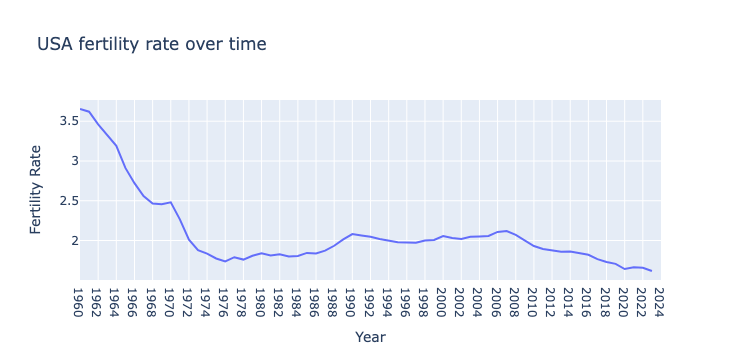

In [11]:
fig = px.line(
    fertility_by_year,
    x="Year",
    y="Fertility Rate",
    title="USA fertility rate over time",
)
fig.show()

### Chart improvements

[Best practice is to have the Y axis start at zero.](https://xdgov.github.io/data-design-standards/visualizations/line-graph) [Set the range:](https://plotly.com/python/axes/#setting-the-range-of-axes-manually)

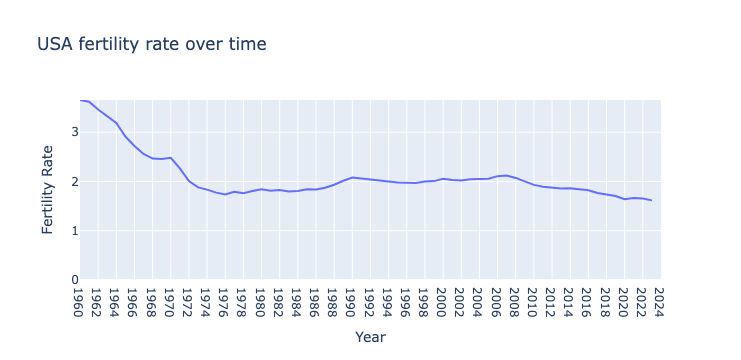

In [12]:
max_fertility = fertility_by_year["Fertility Rate"].max()
fig.update_yaxes(range=[0, max_fertility])
fig.show()

All the years showing up at the bottom is a hint that those x values are strings.

In [13]:
fertility_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            65 non-null     object 
 1   Fertility Rate  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


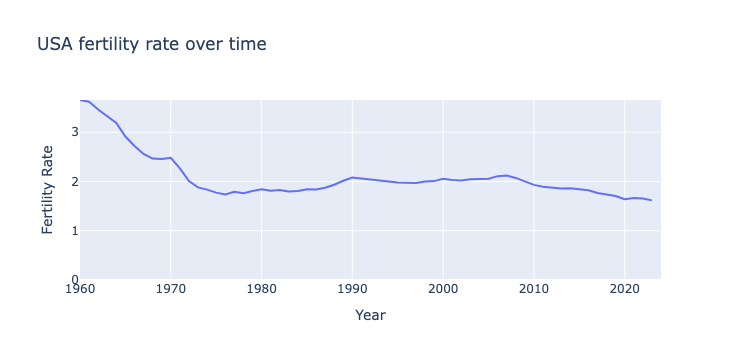

In [14]:
fertility_by_year["Year"] = fertility_by_year["Year"].astype(int)

fig = px.line(
    fertility_by_year,
    x="Year",
    y="Fertility Rate",
    title="USA fertility rate over time",
)
fig.update_yaxes(range=[0, max_fertility])
fig.show()

## Mapping

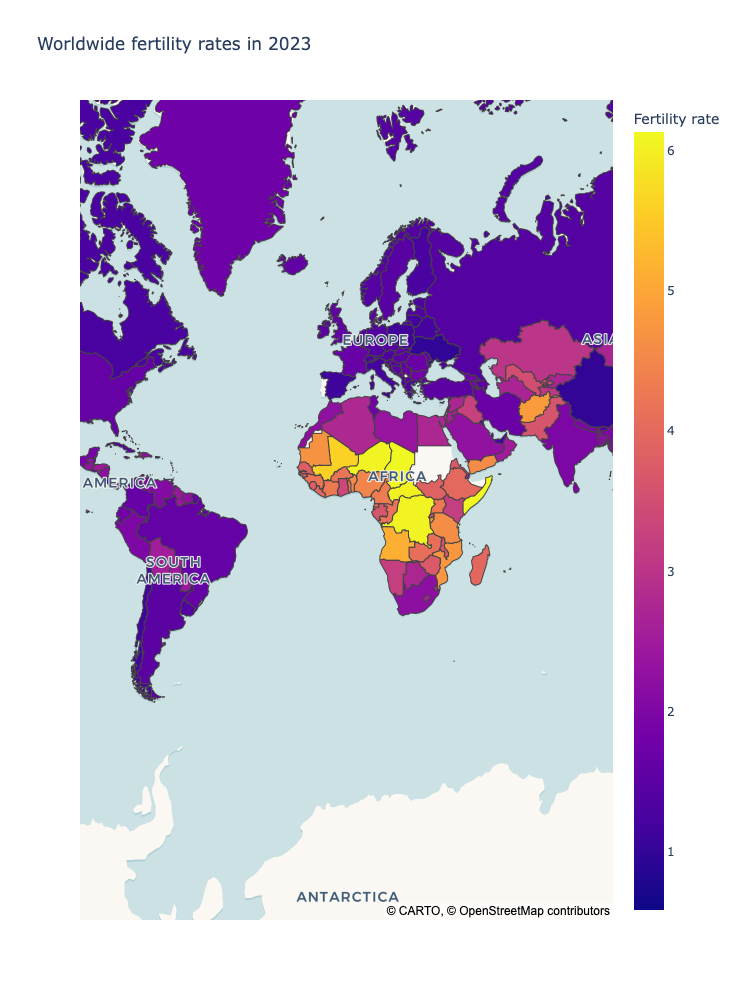

In [15]:
column = "2023"

fig = px.choropleth_map(
    fertility,  # source data
    locations="Country Code",  # column name to match on
    geojson="https://raw.githubusercontent.com/nvkelso/natural-earth-vector/refs/heads/master/geojson/ne_50m_admin_0_countries.geojson",  # shapes
    featureidkey="properties.ADM0_ISO",  # GeoJSON property to match on
    color=column,  # column name for values
    labels={column: "Fertility rate"},  # change the name of the measurement
    title="Worldwide fertility rates in 2023",
    hover_name="Country Name",
    zoom=1,
    height=1000,
)
fig.show()